In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.calibration import calibration_curve
from sklearn.metrics import RocCurveDisplay


def resize_image(image_data):
    #normalising data to a scale (0-1) and reshaping image data
    for x in range(len(image_data)):
        resized_data=image_data[x].reshape(28,28).astype(np.uint8)
    return image_data

# Function to Process the data
def data_gen(input,output):
    one_data=[[],[]]
    five_data=[[],[]]
    processed_data=[]
    processed_data_output=[]
    for x in input:
        intensity_data=intensity(x)
        symmetry_data=symmetry(x)*100
        features=[intensity_data,symmetry_data]
        processed_data.append(features)
    for i in range(len(output)):
        if output[i]==1:
            processed_data_output.append(1)      
            one_data[0].append(processed_data[i][0])
            one_data[1].append(processed_data[i][1])
        elif output[i]==5:
            processed_data_output.append(-1)      
            five_data[0].append(processed_data[i][0])
            five_data[1].append(processed_data[i][1])
    
    return processed_data,processed_data_output,one_data,five_data

## Defining Features
def intensity(raw_data):
    #calculating intensity
    raw_data= np.mean(raw_data)
    return raw_data

def symmetry(raw_image_data):
    #checking symmetry
    A=raw_image_data
    B=np.flip(A, axis=0)
    intersection = cv2.bitwise_and(A,B)
    union = cv2.bitwise_or(A,B)
    result = cv2.countNonZero(intersection)/cv2.countNonZero(union)
    return result


In [2]:
# Load the Data
training_data = pd.read_csv(r"mnist_train_binary.csv")
test_data = pd.read_csv(r"mnist_test_binary.csv")

## Data Preparation

# Data Reshaping [Training Data]
x_train_no_processing = training_data.drop(['label'], axis=1).to_numpy()
y_train_data = training_data['label']

# Data Reshaping [Test Data]
x_test_no_processing = test_data.drop(['label'], axis=1).to_numpy()
y_test_data = test_data['label']

# Data Preprocessing
x_train_no_processing=resize_image(x_train_no_processing)
x_test_no_processing=resize_image(x_test_no_processing)

# Data Processing
train_data_processed,train_op_data,one_points,five_points=data_gen(x_train_no_processing,y_train_data)
test_data_processed,test_op_data,test_one_points,test_five_points=data_gen(x_test_no_processing,y_test_data)

Logistic Regression
ETest : 0.3532313764183522
EIn:  0.3551755323522157


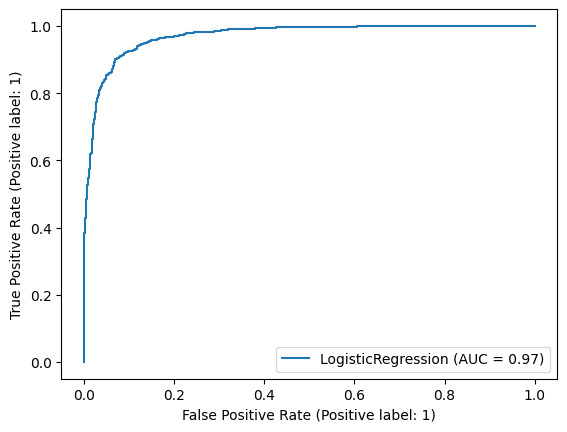

In [3]:
## Logistic Regression
print ("Logistic Regression")
log_reg=LogisticRegression()
log_reg.fit(train_data_processed,train_op_data)
log_reg_pred=log_reg.predict(test_data_processed)
weight_1,weight_2=log_reg.coef_[0][0],log_reg.coef_[0][1]
weight_0= log_reg.intercept_[0]
slope=-weight_1/weight_2
constant=-weight_0/weight_2
logistic_regression_perfomance=RocCurveDisplay.from_estimator(log_reg,test_data_processed,y_test_data)
print("ETest :",mean_squared_error(test_op_data,log_reg_pred))
print("EIn: ",mean_squared_error(train_op_data,log_reg.predict(train_data_processed)))

Linear SVM
ETest : 0.3571780957079428
EIn:  0.35780646222149143


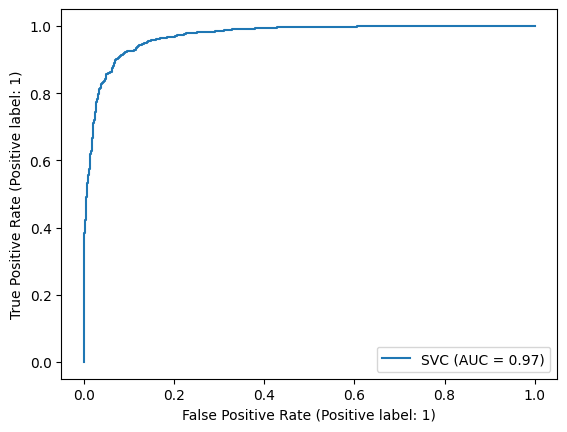

In [4]:
## Linear SVM
print ("Linear SVM")
svm=SVC(kernel='linear',max_iter=-1,C=1)
svm.fit(train_data_processed,train_op_data)
svm_pred=svm.predict(test_data_processed)
weight_1,weight_2=svm.coef_[0][0],svm.coef_[0][1]
weight_0= svm.intercept_
slope=-weight_1/weight_2
constant=-weight_0/weight_2
svm_perfomance=RocCurveDisplay.from_estimator(svm,test_data_processed,y_test_data)
print("ETest :",mean_squared_error(test_op_data,svm_pred))
print("EIn: ",mean_squared_error(train_op_data,svm.predict(train_data_processed)))

Neural Network
ETest : 0.3492846571287617
EIn:  0.35024253884732387


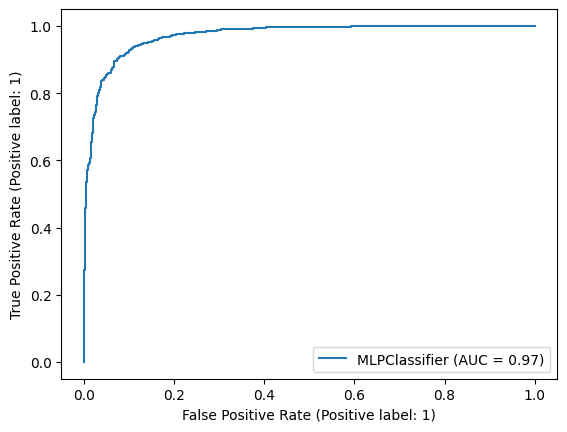

In [5]:
## Neural Network [MLP]
print("Neural Network")
neural_n=MLPClassifier()
neural_n.fit(train_data_processed,train_op_data)
neural_n_pred=neural_n.predict(test_data_processed)
weight_1,weight_2=neural_n.coefs_[0][0],neural_n.coefs_[0][1]
weight_0= neural_n.intercepts_[0][0]
slope=-weight_1/weight_2
constant=-weight_0/weight_2
neural_n_perfomance=RocCurveDisplay.from_estimator(neural_n,test_data_processed,y_test_data)
print("ETest :",mean_squared_error(test_op_data,neural_n_pred))
print("EIn: ",mean_squared_error(train_op_data,neural_n.predict(train_data_processed)))